In [1]:
import pandas as pd     # used for data manipulation & analysis
import numpy as np      # used for numerical operation
import matplotlib.pyplot as plt   # used for data visualization
import seaborn as sns   # used for data visualization

In [3]:
dataframe = pd.read_csv("Zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### Data cleaning process

In [5]:
# We remove /5 to convert the rating into a clean numeric value so it can be properly analyzed,compared,& used in calculations like averages & sorting.
dataframe["rate"] = dataframe["rate"].str.replace("/5", "",regex=False)     # regex=False for exact match
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
44,Onesta,Yes,Yes,4.6,2556,600,other
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
38,Empire Restaurant,Yes,No,4.4,4884,750,other
86,Meghana Foods,Yes,No,4.4,4401,600,Dining
52,Corner House Ice Cream,No,No,4.3,345,400,Dining
...,...,...,...,...,...,...,...
126,Banashankari Nati Style,No,No,2.9,0,350,Dining
125,Soms Kitchen & Bakes,No,No,2.9,0,400,Dining
31,Foodiction,Yes,No,2.8,506,500,other
36,Fast And Fresh,Yes,No,2.8,91,400,Dining


In [6]:
dataframe['rate'] = dataframe['rate'].str.strip()  # Remove any spaces

In [7]:
dataframe.info() # return dataset info

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 44 to 94
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 9.2+ KB


In [13]:
dataframe.isnull().sum()  # check null value

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### Visualization

In [26]:
top_restaurants = dataframe.sort_values(by=['rate', 'votes'], ascending=False).head(10)
top_restaurants[['name', 'rate', 'votes']]

,name,rate,votes
44,Onesta,4.6,2556
7,Onesta,4.6,2556
38,Empire Restaurant,4.4,4884
86,Meghana Foods,4.4,4401
52,Corner House Ice Cream,4.3,345
37,Szechuan Dragon,4.2,1647
9,Smacznego,4.2,504
34,Faasos,4.2,415
57,Wamama,4.2,354
60,Peppy Peppers,4.2,244


#### Conclusion:Top restaurants combine high ratings with many votes, showing strong popularity and customer trust.

Text(0.5, 1.0, 'Distribution of Restaurant  Types')

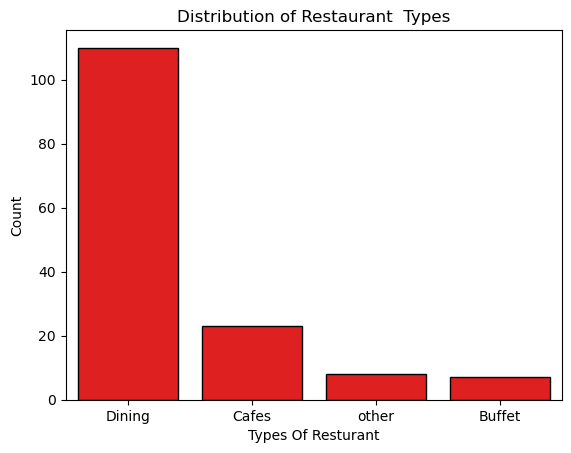

In [98]:
sns.countplot(
              x=dataframe['listed_in(type)'],
              order=dataframe['listed_in(type)'].value_counts().index,  # order controls the sequence of categories shown on the axis.
              color='red',
              edgecolor='black')   
            
plt.xlabel("Types Of Resturant")
plt.ylabel("Count")
plt.title("Distribution of Restaurant  Types")

#### Conclusion:Most restaurants are dining-type, followed by cafes, while buffet and other types are few, showing dine-in dominance.

Text(0.5, 1.0, 'Total Votes by Restaurant Type')

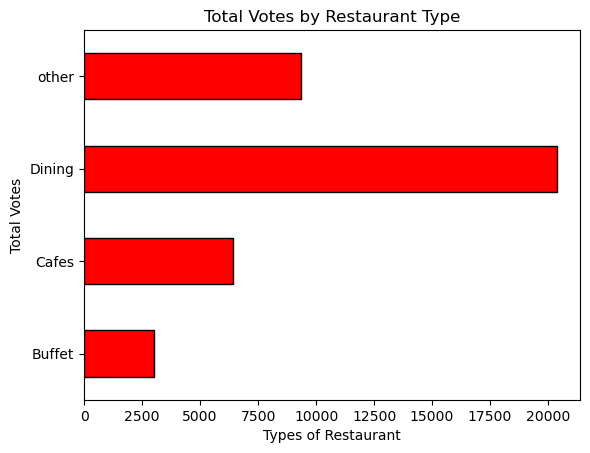

In [97]:
# Group votes by restaurant type
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

result['votes'].plot(kind='barh',color='red',edgecolor='black')  # Plot

plt.xlabel("Types of Restaurant")
plt.ylabel("Total Votes")
plt.title("Total Votes by Restaurant Type")

#### Conclusion:Dining restaurants received the highest total votes,

Text(0.5, 1.0, 'Distribution of Ratings')

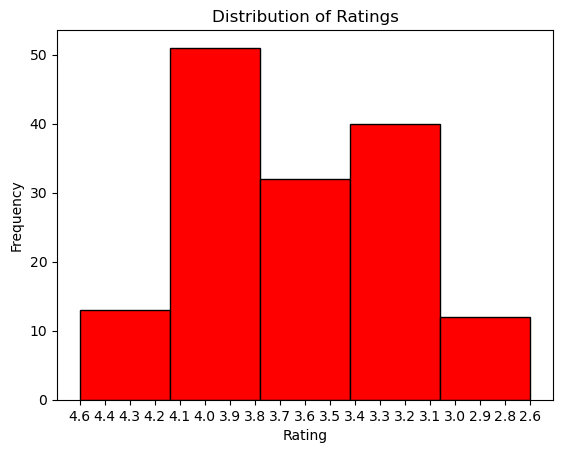

In [131]:
dataframe = dataframe.sort_values(by='rate', ascending=False)

plt.hist(dataframe['rate'], bins=5, color='red', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

#### Conclusion:the majority resturants received ratings from 3.5 to 5

Text(0.5, 1.0, 'Distribution of Approximate Cost')

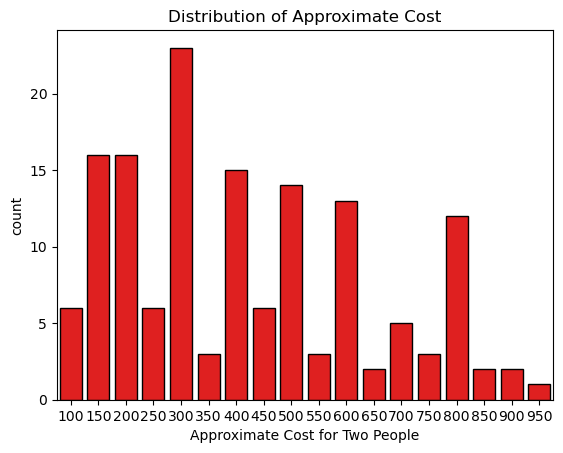

In [102]:
couple_data = dataframe['approx_cost(for two people)']    # Select the column
sns.countplot(x=couple_data, color='red',
              edgecolor='black')  # Plot countplot

plt.xlabel("Approximate Cost for Two People")
plt.title("Distribution of Approximate Cost")

#### Conclusion:The majority of couples preffer resturants with an approximate cost of 300 rupees

Text(0.5, 1.0, 'Rating Distribution:Online vs Offline Orders')

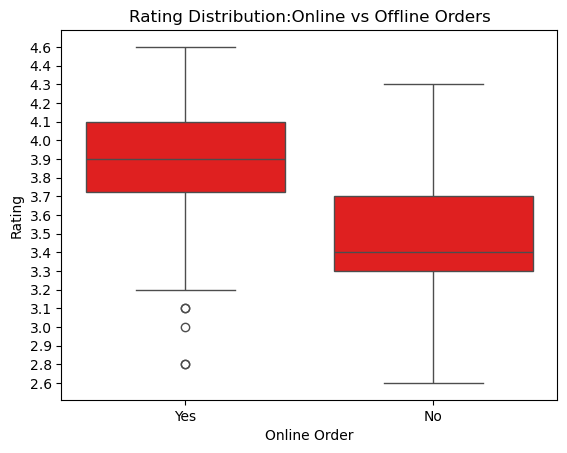

In [9]:
dataframe = dataframe.sort_values(by='rate', ascending=False)
sns.boxplot(x="online_order", y="rate", data=dataframe,color="red")

plt.xlabel("Online Order")
plt.ylabel("Rating")
plt.title("Rating Distribution:Online vs Offline Orders")

#### Conclusion:Offline order received lower ratings in comparision to online order

Text(0.5, 1.0, 'Heatmap of Restaurant Type vs Online Order')

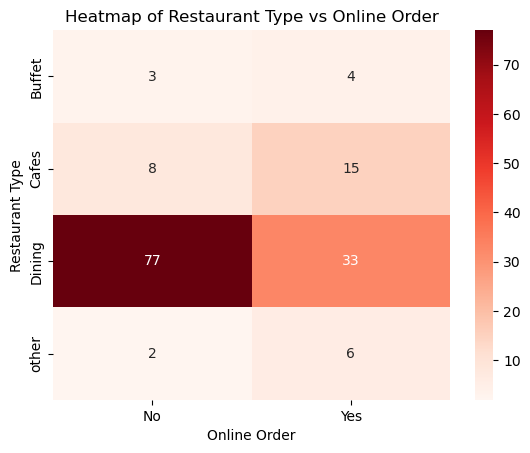

In [19]:
pivot_table = dataframe.pivot_table(
                                   index='listed_in(type)',
                                   columns='online_order',
                                   aggfunc='size',
                                   fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="Reds", fmt='d')

plt.xlabel("Online Order")
plt.ylabel("Restaurant Type")
plt.title("Heatmap of Restaurant Type vs Online Order")

#### Conclusion:Dinning restaurants primarily accept offline orders,whereas cafes primarily receive online orders.This suggests that clients prefer orders in person at restaurants,but prefer online ordering at cafes.

In [35]:
dataframe['rate'] = pd.to_numeric(dataframe['rate'], errors='coerce')

In [37]:
# Use NumPy to calculate mean
avg_rate = np.mean(top_restaurants['rate'])
avg_votes = np.mean(top_restaurants['votes'])

print("Average Rating of Top Restaurants:", avg_rate)
print("Average Votes of Top Restaurants:", avg_votes)

Average Rating of Top Restaurants: 4.33
Average Votes of Top Restaurants: 1790.6
